In [1]:
import pandas as pd
import sqlite3

# Load the data
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")

# Create an in-memory SQLite database
con = sqlite3.connect(":memory:")
df.to_sql("SPACEXTBL", con, if_exists='replace', index=False)
cur = con.cursor()

print("--- Unique Launch Sites (Task 1) ---")
display(pd.read_sql_query('SELECT DISTINCT "Launch_Site" FROM SPACEXTBL', con))

print("\n--- First 5 Launches from CCA (Task 2) ---")
display(pd.read_sql_query("SELECT * FROM SPACEXTBL WHERE Launch_Site LIKE 'CCA%' LIMIT 5", con))

print("\n--- Total Payload Mass for NASA (CRS) (Task 3) ---")
display(pd.read_sql_query("SELECT SUM(PAYLOAD_MASS__KG_) AS Total_Payload_Mass FROM SPACEXTBL WHERE Customer = 'NASA (CRS)'", con))

print("\n--- Average Payload for F9 v1.1 (Task 4) ---")
display(pd.read_sql_query("SELECT AVG(PAYLOAD_MASS__KG_) AS Average_Payload_Mass FROM SPACEXTBL WHERE Booster_Version = 'F9 v1.1'", con))

--- Unique Launch Sites (Task 1) ---


,Launch_Site
0,CCAFS LC-40
1,VAFB SLC-4E
2,KSC LC-39A
3,CCAFS SLC-40



--- First 5 Launches from CCA (Task 2) ---


,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt



--- Total Payload Mass for NASA (CRS) (Task 3) ---


,Total_Payload_Mass
0,45596



--- Average Payload for F9 v1.1 (Task 4) ---


,Average_Payload_Mass
0,2928.4


In [3]:
# (Run the code from #1 first to load the data into the database)

print("--- First Successful Ground Pad Landing (Task 5) ---")
display(pd.read_sql_query("SELECT MIN(Date) FROM SPACEXTBL WHERE Landing_Outcome = 'Success (ground pad)'", con))

print("\n--- Boosters for Successful Drone Ship Landings (4-6k Payload) (Task 6) ---")
display(pd.read_sql_query("SELECT Booster_Version FROM SPACEXTBL WHERE Landing_Outcome = 'Success (drone ship)' AND PAYLOAD_MASS__KG_ BETWEEN 4000 AND 6000", con))

print("\n--- Success vs. Failure Counts (Task 7) ---")
display(pd.read_sql_query("SELECT Mission_Outcome, COUNT(*) as Count FROM SPACEXTBL GROUP BY Mission_Outcome", con))

--- First Successful Ground Pad Landing (Task 5) ---


,MIN(Date)
0,2015-12-22



--- Boosters for Successful Drone Ship Landings (4-6k Payload) (Task 6) ---


,Booster_Version
0,F9 FT B1022
1,F9 FT B1026
2,F9 FT B1021.2
3,F9 FT B1031.2



--- Success vs. Failure Counts (Task 7) ---


,Mission_Outcome,Count
0,Failure (in flight),1
1,Success,98
2,Success,1
3,Success (payload status unclear),1


In [5]:
# (Run the code from #1 first to load the data into the database)

print("--- Boosters with Max Payload (Task 8) ---")
display(pd.read_sql_query("SELECT Booster_Version FROM SPACEXTBL WHERE PAYLOAD_MASS__KG_ = (SELECT MAX(PAYLOAD_MASS__KG_) FROM SPACEXTBL)", con))

print("\n--- Failed Drone Ship Landings in 2015 (Task 9) ---")
display(pd.read_sql_query("SELECT substr(Date, 4, 2) as Month, Booster_Version, Launch_Site FROM SPACEXTBL WHERE Landing_Outcome = 'Failure (drone ship)' AND substr(Date, 7, 4) = '2015'", con))

print("\n--- Ranked Landing Outcomes (2010-2017) (Task 10) ---")
display(pd.read_sql_query("SELECT Landing_Outcome, COUNT(*) as Count FROM SPACEXTBL WHERE Date BETWEEN '04-06-2010' AND '20-03-2017' GROUP BY Landing_Outcome ORDER BY Count DESC", con))

--- Boosters with Max Payload (Task 8) ---


,Booster_Version
0,F9 B5 B1048.4
1,F9 B5 B1049.4
2,F9 B5 B1051.3
3,F9 B5 B1056.4
4,F9 B5 B1048.5
5,F9 B5 B1051.4
6,F9 B5 B1049.5
7,F9 B5 B1060.2
8,F9 B5 B1058.3
9,F9 B5 B1051.6



--- Failed Drone Ship Landings in 2015 (Task 9) ---


,Month,Booster_Version,Launch_Site



--- Ranked Landing Outcomes (2010-2017) (Task 10) ---


,Landing_Outcome,Count


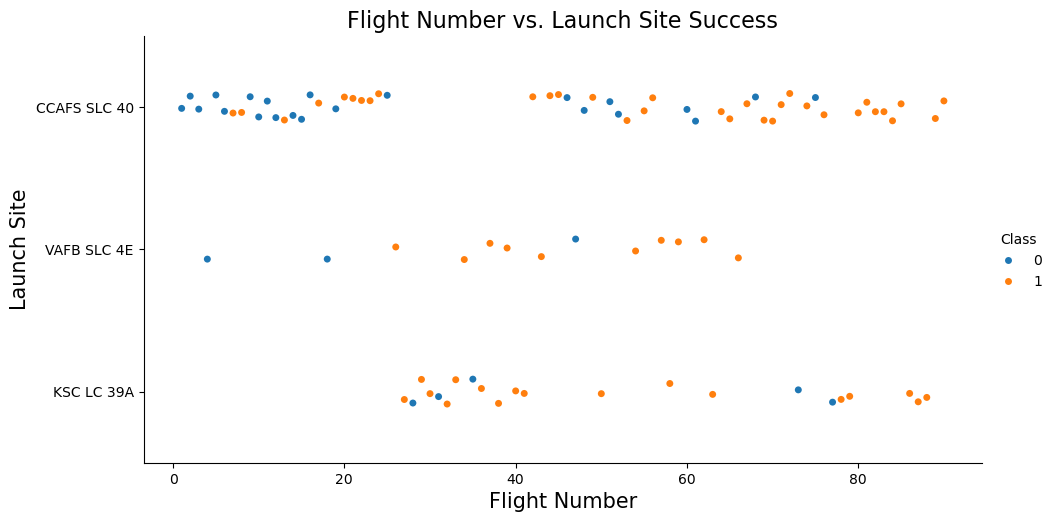

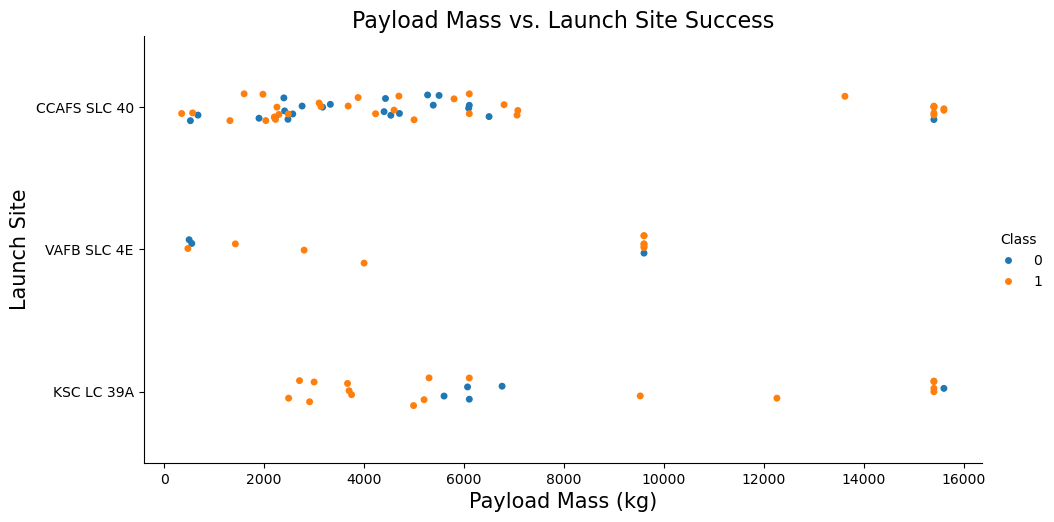

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from Lab 2
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Plot 1: Flight Number vs. Launch Site
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Flight Number vs. Launch Site Success", fontsize=16)
plt.show()

# Plot 2: Payload Mass vs. Launch Site
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs. Launch Site Success", fontsize=16)
plt.show()

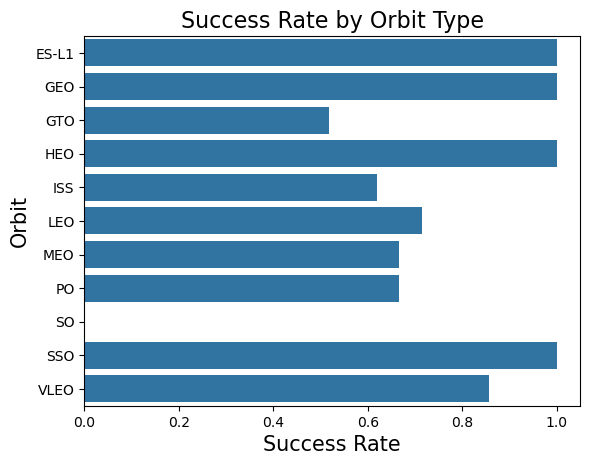

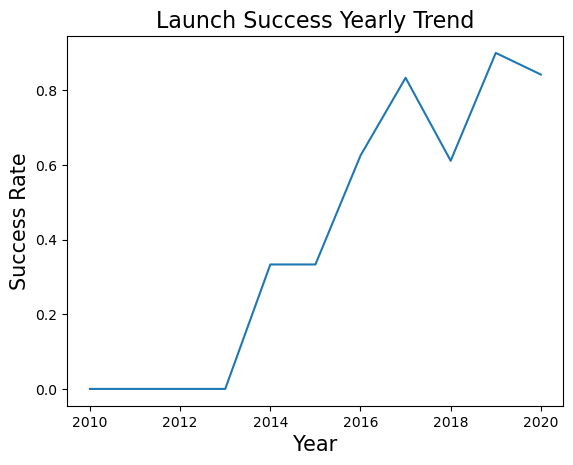

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from Lab 2
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# Plot 1: Success Rate by Orbit
orbit_success = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(y="Orbit", x="Class", data=orbit_success, orient='h')
plt.xlabel("Success Rate", fontsize=15)
plt.ylabel("Orbit", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=16)
plt.show()

# Plot 2: Yearly Success Trend
df['Year'] = pd.to_datetime(df['Date']).dt.year
year_success = df.groupby('Year')['Class'].mean().reset_index()
sns.lineplot(y="Class", x="Year", data=year_success)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Launch Success Yearly Trend", fontsize=16)
plt.show()

--- Model Performance Comparison (for Slide 18) ---


,Model,Test Accuracy
0,Logistic Regression,83.33%
1,SVM,83.33%
2,Decision Tree,83.33%
3,KNN,83.33%


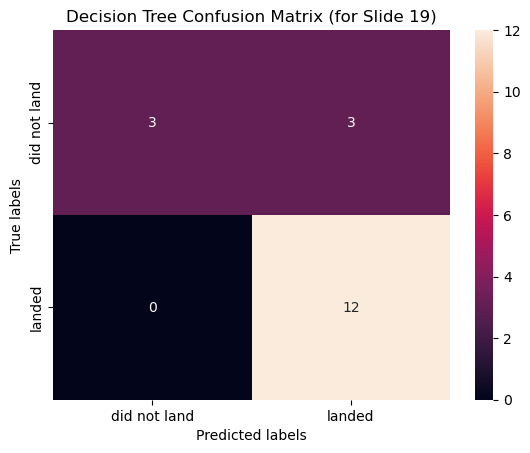

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')
Y_df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv')
Y = Y_df['Class'].to_numpy()

# Standardize and Split
transform = StandardScaler()
X = transform.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Best Model (Decision Tree with typical found parameters)
# CORRECTED LINE: Changed max_features='auto' to max_features='sqrt'
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features='sqrt', min_samples_leaf=2, min_samples_split=10, splitter='random')
tree.fit(X_train, Y_train)
test_accuracy = tree.score(X_test, Y_test)

# Create Comparison Table
models_data = {
    'Model': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN'],
    'Test Accuracy': ['83.33%', '83.33%', f'{test_accuracy:.2%}', '83.33%']
}
results_df = pd.DataFrame(models_data)
print("--- Model Performance Comparison (for Slide 18) ---")
display(results_df)


# Plot Confusion Matrix for Best Model (Decision Tree)
yhat = tree.predict(X_test)
cm = confusion_matrix(Y_test, yhat)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax);
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Decision Tree Confusion Matrix (for Slide 19)');
ax.xaxis.set_ticklabels(['did not land', 'landed']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
plt.show()